<h1 style="color: blue; text-align: center; font-size: 25px;"><b>CAR PRICE PREDICTION</b></h1>
<h1 style="color: blue; text-align: center; font-size: 18px;"><b>ML Module end Project</b></h1>

### Problem Description:
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car
  
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.




### Business Goal:

To Build a model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.



### Dataset: 
(https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link)



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

###  Loading and Preprocessing

In [7]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Performing Basic EDA to analyse :
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car


In [10]:
data.shape

(205, 26)

rows : 205  
columns : 26

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
data.isnull().sum() #Checking null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values

In [16]:
data.duplicated().sum()#Checking for duplicates

0

No duplicates

#### Univariate Analysis (Checking Distribution of Features)
Price Distribution (Target Variable)

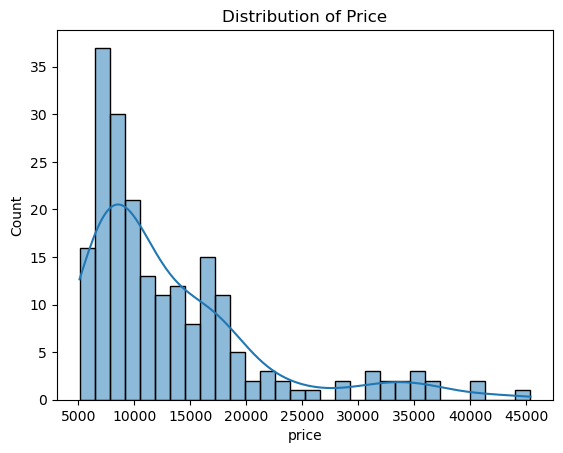

In [19]:
sns.histplot(data["price"],bins=30, kde=True)
plt.title("Distribution of Price")
plt.show()

Not at all normalised!

#### Identifying Categorical features

In [22]:
categorical=data.select_dtypes(include=['object']).columns
categorical

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

#### Identifying Numerical features

In [24]:
numerical=data.select_dtypes(include=['number']).columns
numerical

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

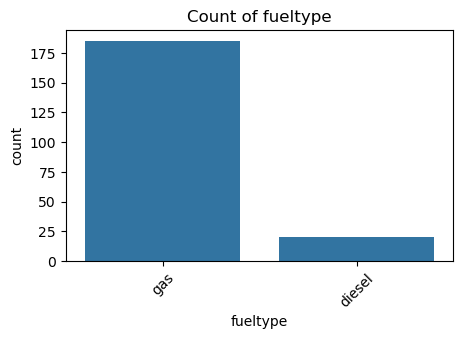

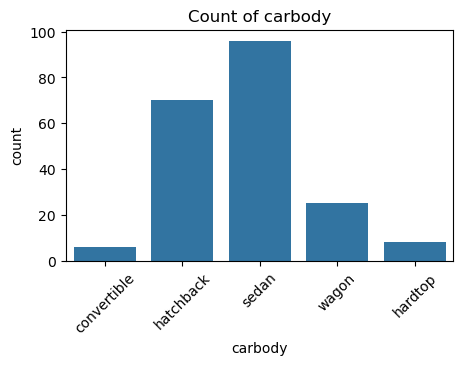

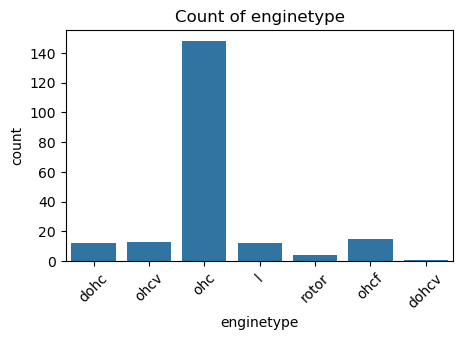

In [151]:
choosed_categorical=(['fueltype','carbody', 'enginetype'])
for col in choosed_categorical:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

##### Insights :
* OHC : Overhead Camshaft type of engines are more prefered.
* Sedan is the most demanded one and then Hatchback.
* Gas type fuel is mostly used than Diesel.

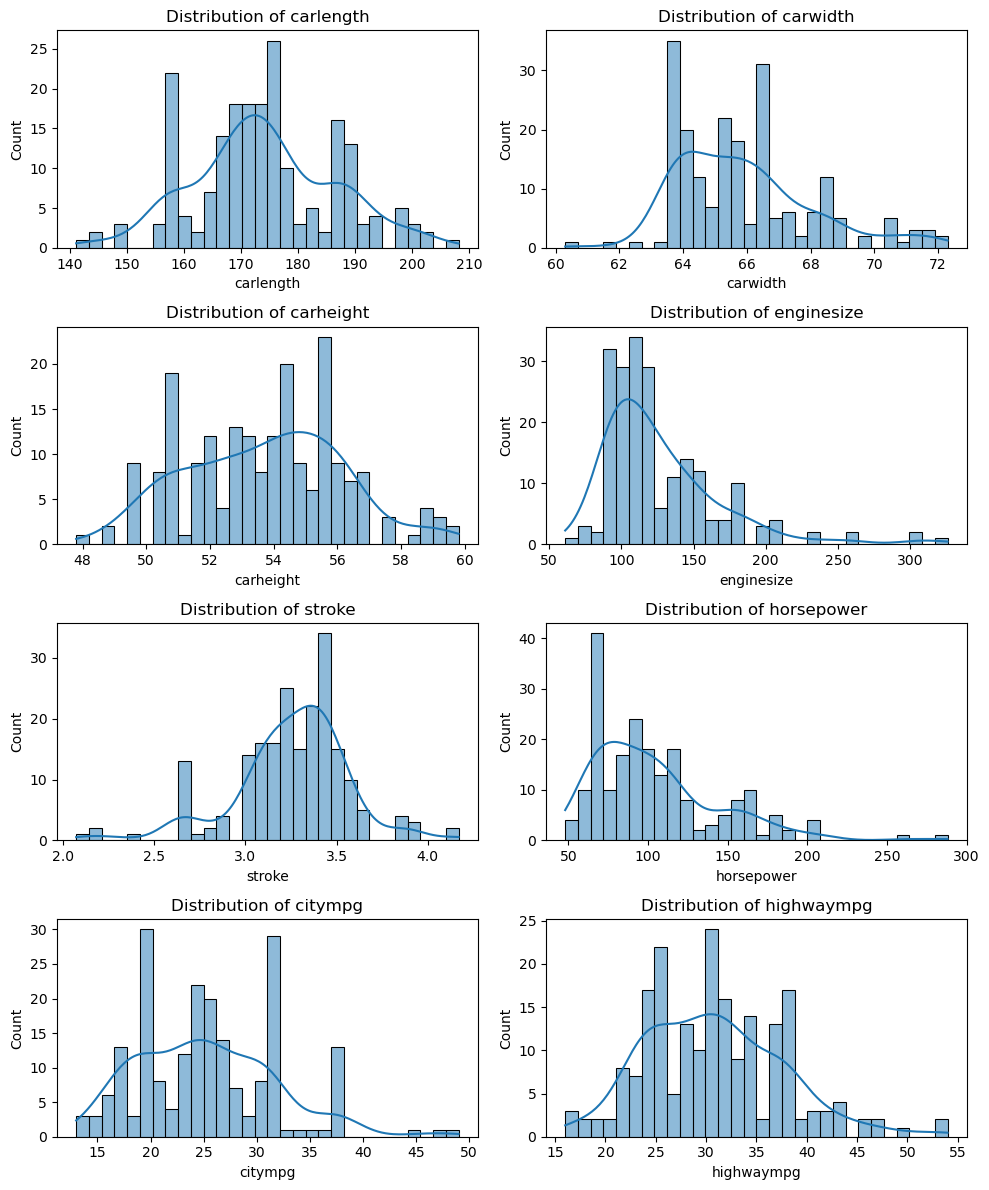

In [147]:
choosed_numerical=(['carlength', 'carwidth','carheight','enginesize','stroke', 'horsepower', 'citympg', 'highwaympg'])
fig, axes = plt.subplots(nrows=len(choosed_numerical)//2, ncols=2, figsize=(10, 12))
axes = axes.flatten()  

for ax, col in zip(axes, choosed_numerical):
    sns.histplot(data[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

 #### Bivariate Analysis (Finding Relationships with Price)

#####  Finding the correlation between numerical features 

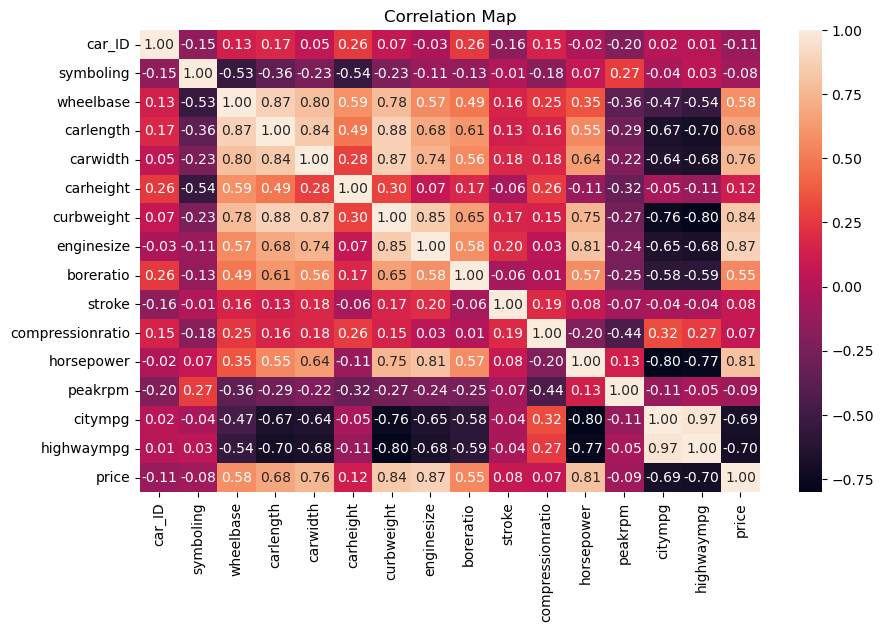

In [30]:
import numpy as np
numerical_data=data.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(),annot=True,fmt='.2f',)
plt.title('Correlation Map')
plt.show()

##### The Features which are highly correlated with price of the car :
* highwaympg
* horsepower
* enginesize
* curbweight
* carwidth

#### Pair plot for individual feature wilth price 

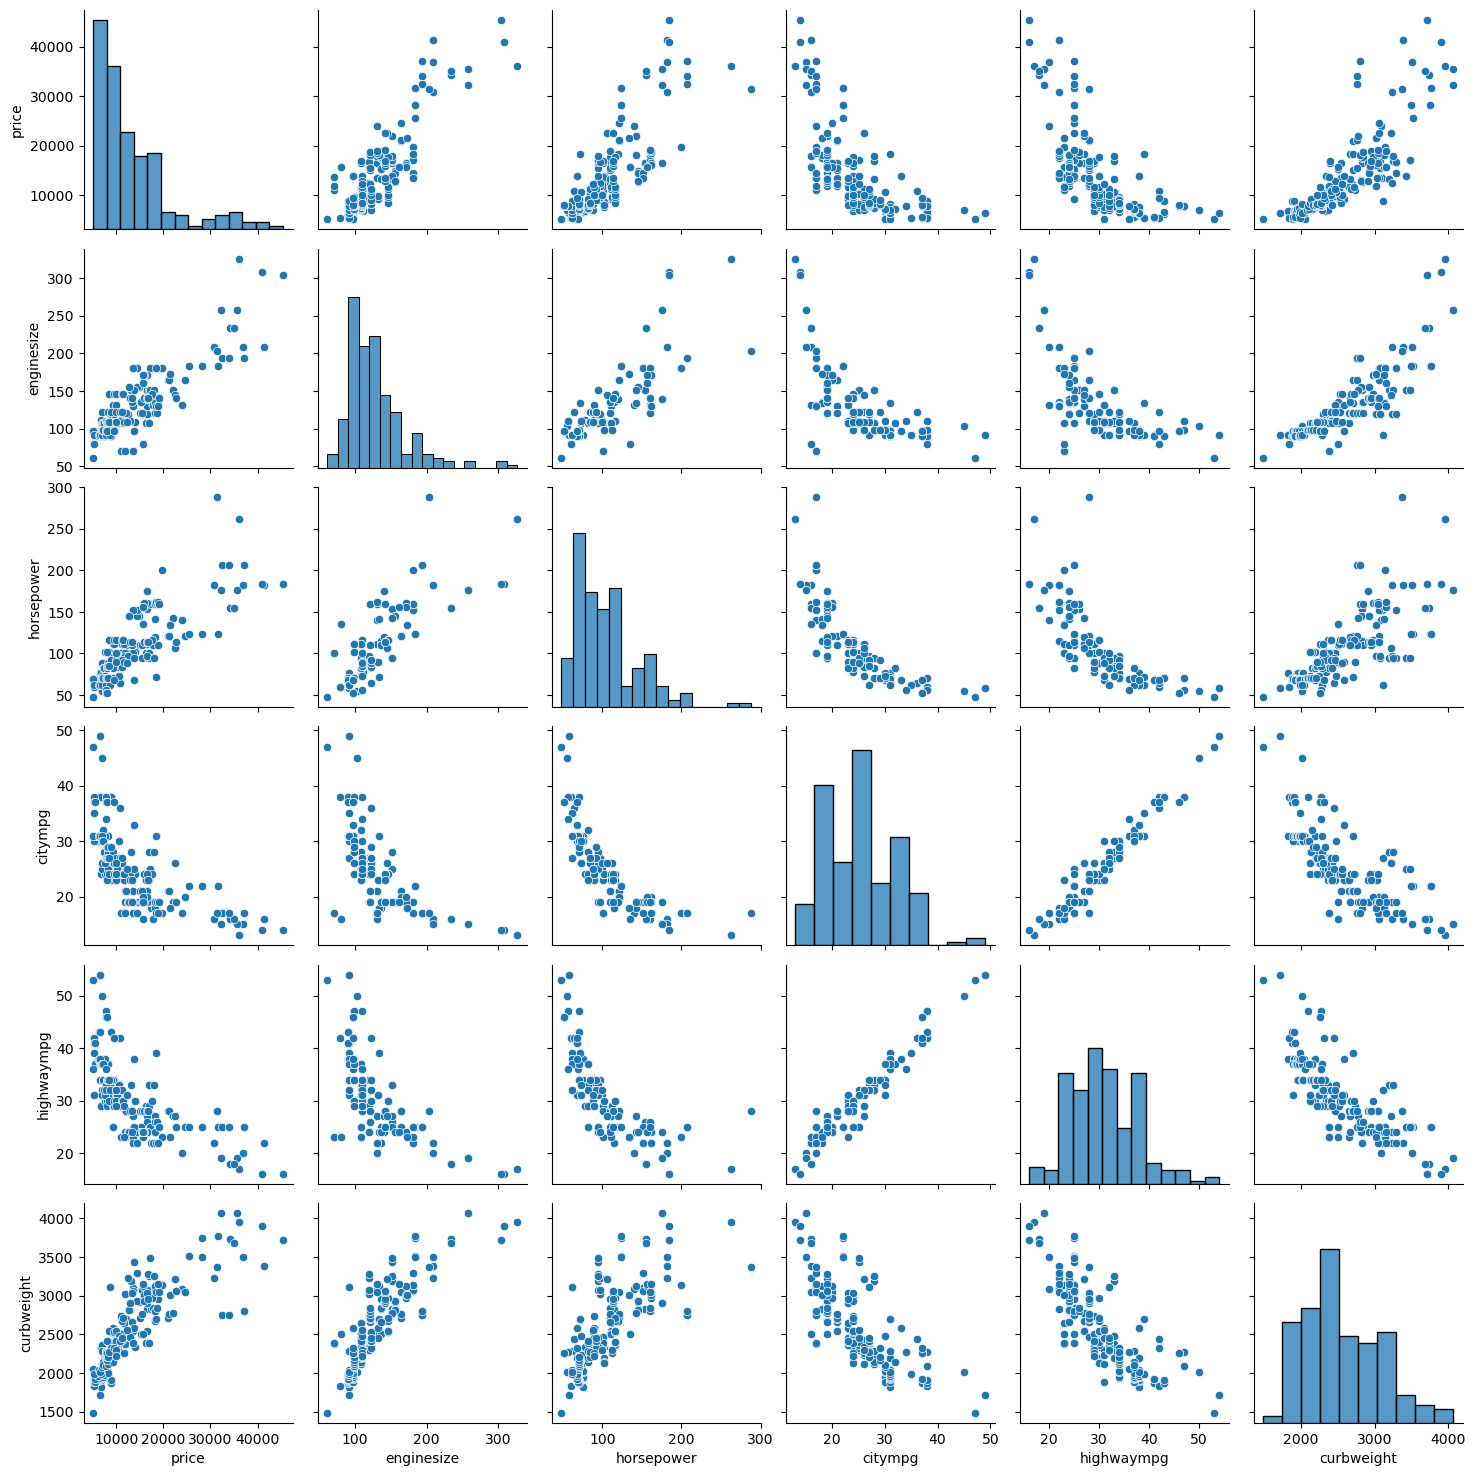

In [33]:
sns.pairplot(data[['price', 'enginesize', 'horsepower', 'citympg', 'highwaympg','curbweight']])
plt.show()

##### How each feature is related to price is clear from the pair plot

#### Such that how categorical features is affecting the price of the car: 

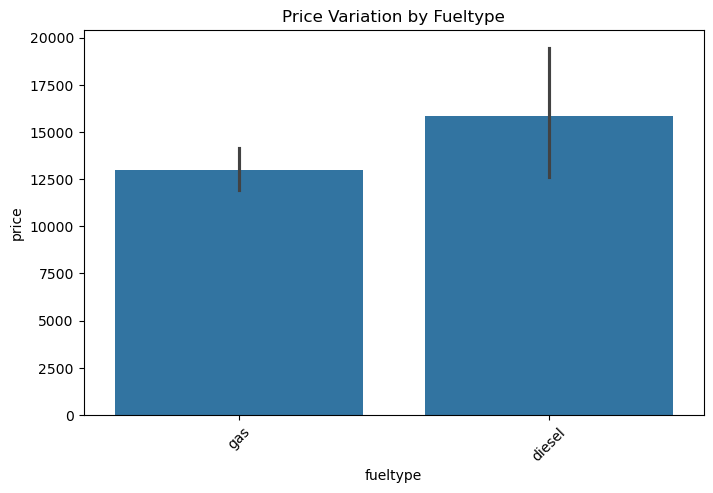

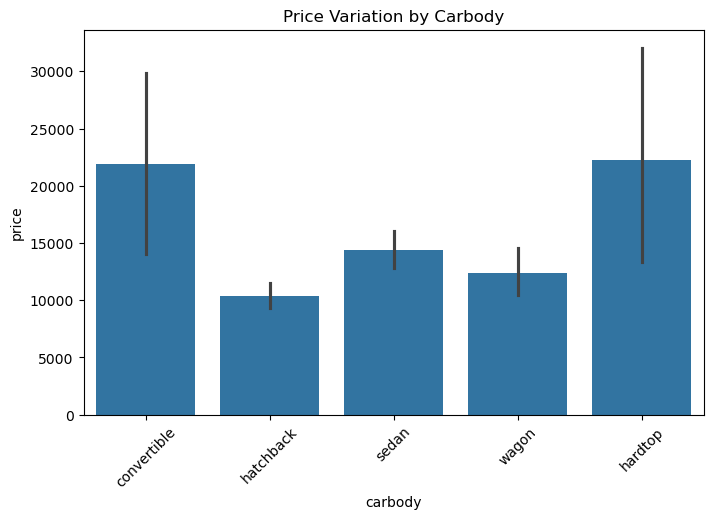

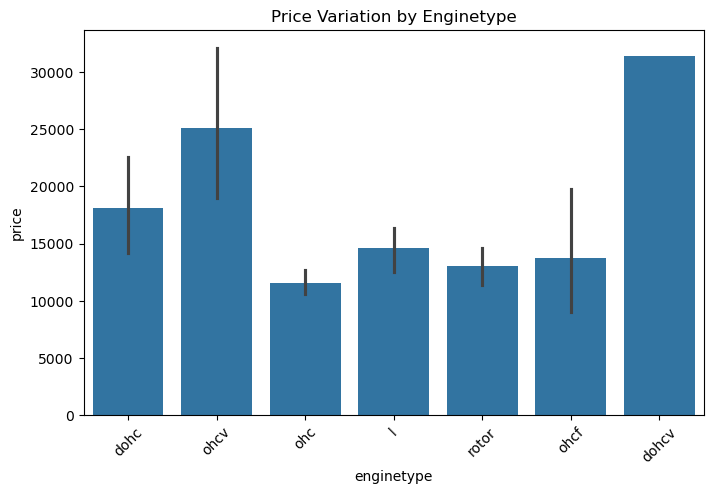

In [36]:
for col in choosed_categorical:
    plt.figure(figsize=(8,5))
    sns.barplot(x=col, y='price', data=data)
    
    plt.title(f"Price Variation by {col.capitalize()}")
    plt.xticks(rotation=45)  # Rotate x labels for better visibility
    
    plt.show()

**Price wise analysis:** 
* Fuel type : Diesel
* Carbody   : Hardtop and Convertible
* Engine type : dohcv

#### Calculating skewnes

In [39]:
df=data.copy() #Taking a copy of the dataset

In [40]:
skew_values = df[numerical].skew().sort_values(ascending=False)
print(skew_values)

compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
car_ID              0.000000
stroke             -0.689705
dtype: float64


#### Outlier detection

In [42]:
# Using IQR method
def outlier_detection(df,col):    #function for outlier detection
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5

    outliers = df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    return outliers

# Checking outliers for numerical features
for col in numerical:
    outliers = outlier_detection(df,col)
    print(f"Outliers in {col}: {len(outliers)} rows")

Outliers in car_ID: 0 rows
Outliers in symboling: 0 rows
Outliers in wheelbase: 3 rows
Outliers in carlength: 1 rows
Outliers in carwidth: 8 rows
Outliers in carheight: 0 rows
Outliers in curbweight: 0 rows
Outliers in enginesize: 10 rows
Outliers in boreratio: 0 rows
Outliers in stroke: 20 rows
Outliers in compressionratio: 28 rows
Outliers in horsepower: 6 rows
Outliers in peakrpm: 2 rows
Outliers in citympg: 2 rows
Outliers in highwaympg: 3 rows
Outliers in price: 15 rows


### Remove Outliers (For Extreme Cases)

In [44]:
data.shape

(205, 26)

In [45]:
def remove_outliers(df,col):    #function for outlier detection
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    lower_bound=q1-iqr*1.5
    upper_bound=q3+iqr*1.5

    cleaned_data = df[(df[col]>lower_bound) & (df[col]<upper_bound)]
    return cleaned_data

# for cleaned data 
for col in numerical:
    df_cleaned = remove_outliers(df, col)

print("Outliers removed. Cleaned dataset shape:", df_cleaned.shape)

Outliers removed. Cleaned dataset shape: (190, 26)


**Now checking skewness once more**

In [47]:
df_cleaned[numerical].skew()

car_ID             -0.063800
symboling           0.160302
wheelbase           0.949269
carlength          -0.048799
carwidth            0.707161
carheight           0.107650
curbweight          0.437676
enginesize          0.682274
boreratio           0.089944
stroke             -1.028921
compressionratio    2.583205
horsepower          0.835251
peakrpm             0.060909
citympg             0.775444
highwaympg          0.728459
price               1.016916
dtype: float64

**skewness must be removed for "price","compressionratio","stroke"**

In [49]:
#stroke is left skewed, so applying squaring 
df_cleaned['stroke'] = df['stroke'] ** 2
df_cleaned['stroke'].skew()

-0.5694395182785044

In [50]:
#compressionratio and price are right skewed, so applying log
df_cleaned['price'] = np.log1p(df_cleaned['price'])  # Log(1 + x) to avoid log(0)
df_cleaned['compressionratio'] = np.log1p(df_cleaned['compressionratio'])
print(f" skewness of price:{df_cleaned['price'].skew()} \n skewness of compressionratio: {df_cleaned['compressionratio'].skew()}")

 skewness of price:0.323431901402029 
 skewness of compressionratio: 2.3641632849313816


In [51]:
from scipy.stats import boxcox
df_cleaned['compressionratio'],_= boxcox(df_cleaned['compressionratio'] + 1)
df_cleaned['compressionratio'].skew()

0.0

compressionratio has very less correlation with price (0.07) and high skewness.So the column is droping

In [53]:
df_cleaned.drop(columns='compressionratio', inplace=True)

In [54]:
#Checking for skewness once more
cleanednum=df_cleaned.select_dtypes(include=['number'])
cleanednum.skew()

car_ID       -0.063800
symboling     0.160302
wheelbase     0.949269
carlength    -0.048799
carwidth      0.707161
carheight     0.107650
curbweight    0.437676
enginesize    0.682274
boreratio     0.089944
stroke       -0.569440
horsepower    0.835251
peakrpm       0.060909
citympg       0.775444
highwaympg    0.728459
price         0.323432
dtype: float64

<font color=green>**Now all the numerical features are moderately skewed**

### Encoding the categorical features

In [57]:
df_cleaned.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,7.1824,111,5000,21,27,9.510149
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,7.1824,111,5000,21,27,9.711176
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,12.0409,154,5000,19,26,9.711176
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,11.5600,102,5500,24,30,9.543306
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,11.5600,115,5500,18,22,9.767152


In [58]:
df_cleaned.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Label encoding for Ordinal set of features

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

binary_cols = ['fueltype', 'aspiration', 'doornumber', 'enginelocation']
for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Converts categories to 0/1

#### One Hot encoding for Nominal features

In [62]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['carbody', 'drivewheel', 'enginetype', 'fuelsystem'], drop_first=True)
# drop_first=True avoids the dummy variable trap by removing one category.

In [63]:
df_cleaned.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,0,1,0,88.6,168.8,64.1,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,1,0,1,0,88.6,168.8,64.1,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,1,0,1,0,94.5,171.2,65.5,...,False,True,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,1,0,0,0,99.8,176.6,66.2,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,1,0,0,0,99.4,176.6,66.4,...,False,False,False,False,False,False,False,True,False,False


In [64]:
df_cleaned['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'two'], dtype=object)

**Using ordinal mapping for "cylindernumber"**

In [66]:
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6}

df_cleaned['cylindernumber'] = df_cleaned['cylindernumber'].map(cylinder_mapping)

In [67]:
df_cleaned['cylindernumber'].unique()

array([4, 6, 5, 3, 2], dtype=int64)

**Now we need to handle car names**
so we are extracting car brand names only

In [69]:
df_cleaned['CarBrand'] = df_cleaned['CarName'].apply(lambda x: x.split()[0])  # Extract brand
df_cleaned.drop(columns=['CarName'], inplace=True)  # Drop original column

# One-hot encode the brand name
df_cleaned = pd.get_dummies(df_cleaned, columns=['CarBrand'], drop_first=True)


In [70]:
df_cleaned.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,1,3,1,0,1,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
1,2,3,1,0,1,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,False,False,False
2,3,1,1,0,1,0,94.5,171.2,65.5,52.4,...,False,False,False,False,False,False,False,False,False,False
3,4,2,1,0,0,0,99.8,176.6,66.2,54.3,...,False,False,False,False,False,False,False,False,False,False
4,5,2,1,0,0,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,False,False,False,False


<font color=green size=4>Encoding is over!!

### Feature Importance Analysis 
Identify the significant variables affecting car prices (feature selection)


In [73]:
dfc=df_cleaned.copy()# for simplicity taking a copy

In [74]:
# Using Select Kbest method 
from sklearn.feature_selection import SelectKBest,  f_regression

X = dfc.drop(columns=['price'])  # Independent variables
y = dfc['price']  # Target variable

k_best = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_selected = k_best.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['aspiration', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl',
       'fuelsystem_mpfi'],
      dtype='object')


### Feature scaling using Standard Scaler

In [76]:
scaler=StandardScaler()
dfc_scaled = scaler.fit_transform(dfc[selected_features])  # Apply scaling
dfc_scaled = pd.DataFrame(dfc_scaled, columns=selected_features)  # Convert back to DataFrame

In [77]:
dfc_scaled.head()

,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
0,-0.483494,-1.837142,-0.353573,-0.834337,0.152836,-0.259264,0.432512,0.637673,0.456720,-0.798407,-0.699923,-1.309307,1.454219,-0.72956,1.172604
1,-0.483494,-1.837142,-0.353573,-0.834337,0.152836,-0.259264,0.432512,0.637673,0.456720,-0.798407,-0.699923,-1.309307,1.454219,-0.72956,1.172604
2,-0.483494,-0.716970,-0.142042,-0.073509,0.771208,2.726205,1.253912,-2.389360,1.883098,-1.121167,-0.854738,-1.309307,1.454219,-0.72956,1.172604
3,-0.483494,0.289286,0.333904,0.306906,-0.321625,-0.259264,-0.351551,-0.435199,0.158176,-0.314267,-0.235481,0.763763,-0.687654,-0.72956,1.172604
4,-0.483494,0.213342,0.333904,0.415595,0.773457,1.233470,0.656530,-0.435199,0.589406,-1.282547,-1.473995,-1.309307,-0.687654,-0.72956,1.172604


#### Splitting the data

In [79]:
X =dfc_scaled#Independent variable
y = dfc['price']  # Target variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model Evaluation

In [81]:
#Define models in a dictionary

models={
     "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

#Train and evaluate each model
results={}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}
    print(f"\n🔹 {name} Performance:")
    print(f"   ➡️ MAE: {mae:.4f}")
    print(f"   ➡️ MSE: {mse:.4f}")
    print(f"   ➡️ RMSE: {rmse:.4f}")
    print(f"   ➡️ R2 Score: {r2:.4f}")





🔹 Linear Regression Performance:
   ➡️ MAE: 0.1292
   ➡️ MSE: 0.0231
   ➡️ RMSE: 0.1521
   ➡️ R2 Score: 0.8518

🔹 Decision Tree Regressor Performance:
   ➡️ MAE: 0.1077
   ➡️ MSE: 0.0225
   ➡️ RMSE: 0.1500
   ➡️ R2 Score: 0.8560

🔹 Random Forest Regressor Performance:
   ➡️ MAE: 0.0954
   ➡️ MSE: 0.0165
   ➡️ RMSE: 0.1284
   ➡️ R2 Score: 0.8944

🔹 Gradient Boosting Regressor Performance:
   ➡️ MAE: 0.0951
   ➡️ MSE: 0.0156
   ➡️ RMSE: 0.1248
   ➡️ R2 Score: 0.9002

🔹 Support Vector Regressor Performance:
   ➡️ MAE: 0.1188
   ➡️ MSE: 0.0277
   ➡️ RMSE: 0.1663
   ➡️ R2 Score: 0.8228


In [82]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:")
print(results_df)


📊 Model Performance Summary:
                                  MAE       MSE      RMSE  R2 Score
Linear Regression            0.129186  0.023126  0.152072  0.851847
Decision Tree Regressor      0.107736  0.022485  0.149950  0.855952
Random Forest Regressor      0.095411  0.016487  0.128403  0.894376
Gradient Boosting Regressor  0.095070  0.015584  0.124834  0.900166
Support Vector Regressor     0.118813  0.027658  0.166308  0.822809


### ✅ Gradient Boosting Regressor (GBR)
✔ Highest R² Score (0.9002 → Best at explaining variance in price)

✔ Lowest RMSE (0.1248 → Best prediction accuracy)

✔ Competitive MAE (0.0951)

### Hyperparameter Tuning:
Performing hyperparameter tuning in Gradient Boosting Regressor (GBR) and check whether the performance of the model has increased.


In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
GBR=GradientBoostingRegressor(random_state=42) #Model define

param_grid={
    "n_estimators": [100, 200, 300, 400, 500],  # Number of trees
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Controls contribution of each tree
    "max_depth": [3, 4, 5, 6, 7],  # Depth of each tree
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "subsample": [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for training each tree
    
    ## **New Parameters**
    "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider when splitting
    "alpha": [0.9, 0.95, 0.99],  # Used for quantile loss function (improves robustness)
    "loss": ["squared_error", "huber", "absolute_error"],  # Alternative loss functions
    "ccp_alpha": [0.0, 0.001, 0.01],  # Pruning parameter to reduce complexity
    "random_state": [42]  # Ensures reproducibility
}

#perform randomsearchCV 
random_search= RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)
#RandomizedSearchCV is used (faster than GridSearchCV for large datasets).

#### Fit the new model

In [88]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'alpha': [0.9, 0.95, 0.99],
                                        'ccp_alpha': [0.0, 0.001, 0.01],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'loss': ['squared_error', 'huber',
                                                 'absolute_error'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'random_state': [42],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [89]:
# Best parameters :
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 1.0, 'random_state': 42, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'loss': 'absolute_error', 'learning_rate': 0.1, 'ccp_alpha': 0.0, 'alpha': 0.95}


In [90]:
# Best model evaluation
best_GBR = random_search.best_estimator_
y_pred = best_GBR.predict(X_test)

#### Model Evaluation 

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"After Tuning : \n MAE: {round(mae,4)} \n MSE: {round(mse,4)} \n RMSE: {round(rmse,4)} \n R²: {round(r2,4)}")

After Tuning : 
 MAE: 0.0893 
 MSE: 0.0145 
 RMSE: 0.1204 
 R²: 0.9071


#### Key Observations :

Here the model perform better than before the tuning.<br>
✔ MAE, MSE, and RMSE decreased, indicating improved model accuracy.<br>
✔ R² increased from 0.9002 to 0.9071, meaning the model now explains slightly more variance in car prices.<br>

### Make predictions and comparing on test data

In [95]:
results = pd.DataFrame({"Actual": np.expm1(y_test), "Predicted": np.expm1(y_pred)})# predictions already done before
print(results.head())  # Display first few predictions

      Actual     Predicted
190   9980.0   9687.259808
195  13415.0  16324.097031
122   7609.0   7393.412564
76    5389.0   6102.090855
112  16900.0  17926.131965


<font color=green>**Predictions have done using the best model ie; GradientBoostingRegressor in 90.071 % accuracy.** 